In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
from pycaret.regression import *

In [4]:
import pandas as pd

df = pd.read_excel("data\data.xlsx")
df

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106
...,...,...,...,...,...,...,...
34628,34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333
34629,34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232
34630,34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054
34631,34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442


In [5]:
df = df.drop(columns=["Unnamed: 0"])
df

,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106
...,...,...,...,...,...,...
34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333
34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232
34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054
34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442


In [6]:
df = df[(df['pm_2_5'] > 0) & (df['pm_2_5'] <= 100)]

df = df[(df['pm_10'] > 0) & (df['pm_10'] <= 100)]
df

,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106
...,...,...,...,...,...,...
34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333
34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232
34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054
34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442


In [7]:
import numpy as np

Q1 = df["pm_2_5"].quantile(0.25)
Q3 = df["pm_2_5"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

df = df[(df["pm_2_5"] >= lower_bound) & (df["pm_2_5"] <= upper_bound)]
df

,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106
...,...,...,...,...,...,...
34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333
34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232
34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054
34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442


In [8]:
import numpy as np

Q1 = df["pm_10"].quantile(0.25)
Q3 = df["pm_10"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

df = df[(df["pm_10"] >= lower_bound) & (df["pm_10"] <= upper_bound)]
df

,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106
...,...,...,...,...,...,...
34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333
34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232
34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054
34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442


In [9]:
import numpy as np

Q1 = df["humidity"].quantile(0.25)
Q3 = df["humidity"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

df = df[(df["humidity"] >= lower_bound) & (df["humidity"] <= upper_bound)]
df

,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106
...,...,...,...,...,...,...
34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333
34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232
34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054
34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442


In [10]:
import numpy as np

Q1 = df["temperature"].quantile(0.25)
Q3 = df["temperature"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

df = df[(df["temperature"] >= lower_bound) & (df["temperature"] <= upper_bound)]
df

,timestamp,timezone,humidity,pm_10,pm_2_5,temperature
0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949
1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300
2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388
3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417
4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106
...,...,...,...,...,...,...
34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333
34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232
34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054
34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442


In [11]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df

,timestamp,timezone,humidity,pm_10,pm_2_5,temperature,hour,day,month
0,2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949,12,11,2
1,2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300,13,11,2
2,2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388,14,11,2
3,2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417,15,11,2
4,2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106,16,11,2
...,...,...,...,...,...,...,...,...,...
34628,2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333,12,4,2
34629,2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232,13,4,2
34630,2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054,14,4,2
34631,2025-02-04 15:00:00,Asia/Bangkok,65.999547,6.864865,6.314815,30.763442,15,4,2


In [12]:
df1 = df.set_index('timestamp')
df1 = df1.sort_index()  # เรียงลำดับตามเวลา
df1

,timezone,humidity,pm_10,pm_2_5,temperature,hour,day,month
timestamp,,,,,,,,
2021-02-11 12:00:00,Asia/Bangkok,72.026242,11.666667,10.563218,30.703949,12,11,2
2021-02-11 13:00:00,Asia/Bangkok,71.049230,10.465517,9.500000,30.923300,13,11,2
2021-02-11 14:00:00,Asia/Bangkok,68.774313,33.646552,24.765217,31.392388,14,11,2
2021-02-11 15:00:00,Asia/Bangkok,66.983002,11.017241,10.025862,32.060417,15,11,2
2021-02-11 16:00:00,Asia/Bangkok,69.181462,10.241379,9.465517,31.455106,16,11,2
...,...,...,...,...,...,...,...,...
2025-02-04 12:00:00,Asia/Bangkok,67.834877,11.245098,10.660550,30.570333,12,4,2
2025-02-04 13:00:00,Asia/Bangkok,66.052356,10.697248,9.884956,31.261232,13,4,2
2025-02-04 14:00:00,Asia/Bangkok,65.621773,8.981651,8.211009,30.837054,14,4,2


In [13]:
df2 = df1.drop(columns=['timezone', 'pm_10'])
df2

,humidity,pm_2_5,temperature,hour,day,month
timestamp,,,,,,
2021-02-11 12:00:00,72.026242,10.563218,30.703949,12,11,2
2021-02-11 13:00:00,71.049230,9.500000,30.923300,13,11,2
2021-02-11 14:00:00,68.774313,24.765217,31.392388,14,11,2
2021-02-11 15:00:00,66.983002,10.025862,32.060417,15,11,2
2021-02-11 16:00:00,69.181462,9.465517,31.455106,16,11,2
...,...,...,...,...,...,...
2025-02-04 12:00:00,67.834877,10.660550,30.570333,12,4,2
2025-02-04 13:00:00,66.052356,9.884956,31.261232,13,4,2
2025-02-04 14:00:00,65.621773,8.211009,30.837054,14,4,2


<Axes: xlabel='timestamp'>

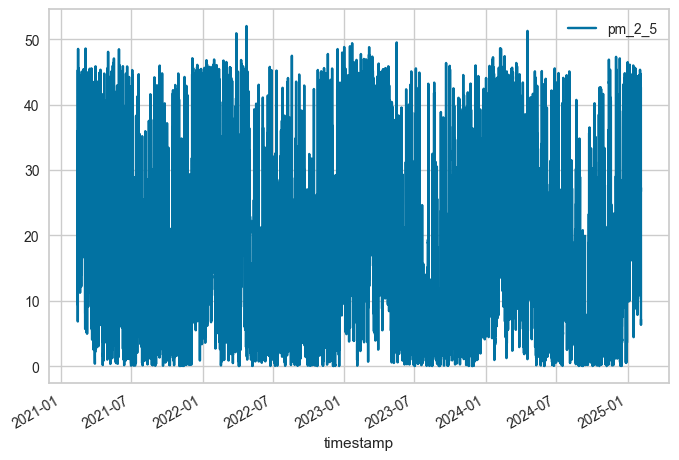

In [32]:
df2.plot(y = 'pm_2_5')

<Axes: xlabel='timestamp'>

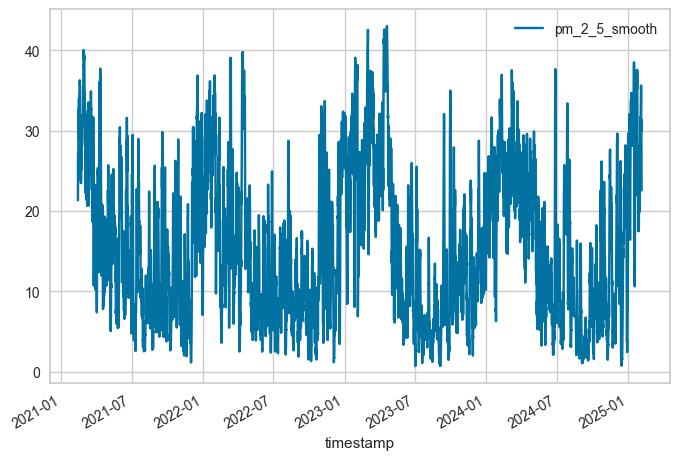

In [26]:
df2['pm_2_5_smooth'] = df2['pm_2_5'].rolling(window=30).mean()
df2.plot(y='pm_2_5_smooth', kind='line')

In [14]:
s = setup(df2, target = 'pm_2_5', session_id = 123, train_size=0.8, 
          iterative_imputation_iters=100, remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(32870, 6)"
4,Transformed data shape,"(31555, 6)"
5,Transformed train set shape,"(24981, 6)"
6,Transformed test set shape,"(6574, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [15]:
exp = RegressionExperiment()
exp.setup(df2, target = 'pm_2_5', session_id = 123, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(32870, 6)"
4,Transformed data shape,"(32870, 6)"
5,Transformed train set shape,"(26296, 6)"
6,Transformed test set shape,"(6574, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [16]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.6391,58.2073,7.6281,0.5833,0.5954,1.7722,1.0010
rf,Random Forest Regressor,5.8816,61.5470,7.8442,0.5595,0.6180,1.9314,1.9690
lightgbm,Light Gradient Boosting Machine,6.2166,65.6857,8.1041,0.5299,0.6423,2.1035,0.3400
knn,K Neighbors Regressor,6.3153,71.4544,8.4523,0.4886,0.6569,2.1756,0.1370
gbr,Gradient Boosting Regressor,6.7037,74.1553,8.6108,0.4692,0.6838,2.3452,0.7590
ada,AdaBoost Regressor,8.3650,96.6865,9.8323,0.3081,0.8499,4.0013,0.2440
lar,Least Angle Regression,8.8448,117.5269,10.8407,0.1588,0.8532,3.7929,0.1320
br,Bayesian Ridge,8.8452,117.5267,10.8407,0.1588,0.8532,3.7933,0.1270
ridge,Ridge Regression,8.8448,117.5269,10.8407,0.1588,0.8532,3.7929,0.1220
lr,Linear Regression,8.8448,117.5269,10.8407,0.1588,0.8532,3.7929,0.7880


In [17]:
best = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.6273,57.3206,7.5710,0.5932,0.5884,1.7819
1,5.7382,61.9723,7.8722,0.5421,0.5977,1.2522
2,5.6252,57.4599,7.5802,0.5968,0.5876,1.6329
3,5.5872,56.9622,7.5473,0.5990,0.5923,2.0242
4,5.7020,58.9452,7.6776,0.5710,0.6007,1.8730
5,5.6575,58.6041,7.6553,0.5799,0.6118,2.4038
6,5.8256,61.5280,7.8440,0.5629,0.5805,1.0434
7,5.5040,54.5306,7.3845,0.6064,0.5974,1.9667
8,5.6423,58.4965,7.6483,0.5855,0.6093,1.8193


In [18]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.6132,59.0067,7.6816,0.5836,0.5956,1.4700


In [20]:
holdout_pred.head()

,humidity,temperature,hour,day,month,pm_2_5,prediction_label
timestamp,,,,,,,
2024-03-14 14:00:00,61.615280,34.747292,14,14,3,12.594828,15.464618
2024-10-05 20:00:00,94.129616,26.601343,20,5,10,12.670886,13.040990
2024-08-03 09:00:00,93.134674,28.302616,9,3,8,23.782608,20.292710
2022-10-07 10:00:00,90.905571,27.176933,10,7,10,2.315789,5.280251
2022-05-12 04:00:00,92.033722,25.191654,4,12,5,11.834783,9.113103


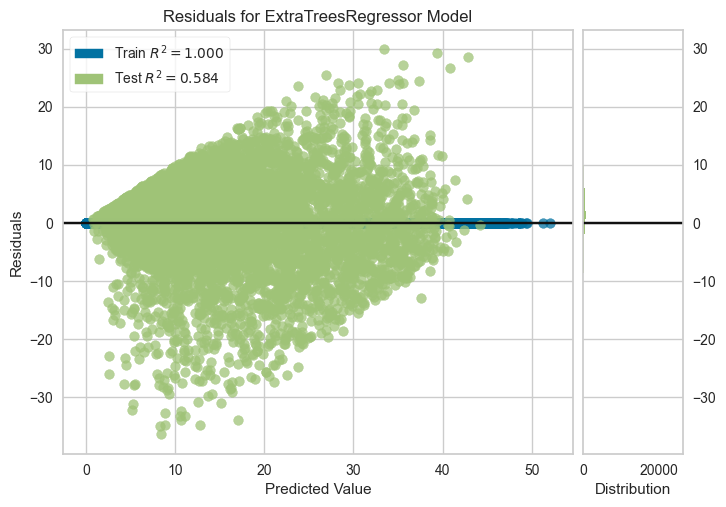

In [33]:
plot_model(best, plot = 'residuals')

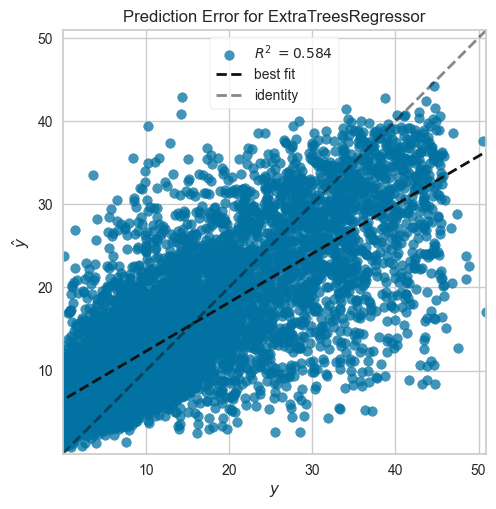

In [34]:
# plot error
plot_model(best, plot = 'error')

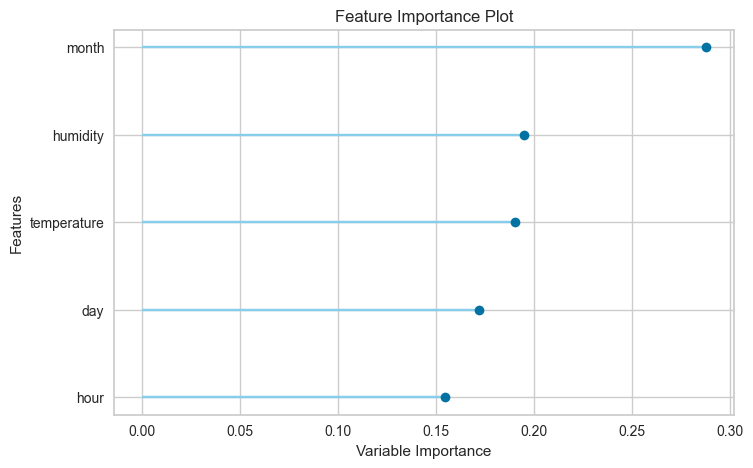

In [35]:

plot_model(best, plot = 'feature')

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ดึงค่าจริงจาก test_df
actual_val = holdout_pred['pm_2_5']

# ดึงค่าทำนายจาก forecast
forecast_val = holdout_pred['prediction_label']

# คำนวณ MAE
mae = mean_absolute_error(actual_val, forecast_val)

# คำนวณ MSE
mse = mean_squared_error(actual_val, forecast_val)

# คำนวณ RMSE
rmse = np.sqrt(mse)

# คำนวณ MAPE
def calculate_mape(actual_val, forecast_val):
    return np.mean(np.abs((actual_val - forecast_val) / actual_val)) * 100

mape = calculate_mape(actual_val, forecast_val)

# คำนวณ R²
r2 = r2_score(actual_val, forecast_val)

# คำนวณความแม่นยำ (Accuracy)
mean_actual = np.mean(actual_val)
accuracy = (1 - (mae / mean_actual)) * 100

# แสดงผลลัพธ์
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(r2)
print(f"R² (ความแม่นยำ): {r2 * 100:.2f}%")
print(f"ความแม่นยำ (Accuracy): {accuracy:.2f}%")

MAE: 5.6132
MSE: 59.0067
RMSE: 7.6816
MAPE: 147.00%
0.5836103471882128
R² (ความแม่นยำ): 58.36%
ความแม่นยำ (Accuracy): 63.20%


In [22]:
print(type(best))

<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>


In [23]:
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['humidity', 'temperature', 'hour',
                                              'day', 'month'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('remove_outliers',
                  TransformerWrapper(transformer=RemoveOutliers(random_state=123))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 'best_model.pkl')